#Problem Statement:
You have been given a mobile price dataset, and you are supposed to create a machine
learning model using logistic regression that will provide accurate predictions of their respective
classes.

#Tasks To Be Performed:
1. Use the train.csv dataset to train a logistic regression classifier.
2. Use the test.csv to make the predictions.
3. Save the predictions made on the test data in a predictions.csv file

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#Loading the dataset

In [323]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [324]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,1183,1,0.5,1,3,1,48,0.1,120,8,...,268,1010,1152,8,3,3,1,0,0,0
1494,574,1,2.0,1,0,1,26,0.5,118,6,...,382,1364,1303,8,4,2,1,0,1,0
1495,1472,0,3.0,0,4,1,20,0.3,169,2,...,443,892,797,6,1,11,1,1,0,0
1496,1868,1,0.5,0,2,1,40,0.9,179,8,...,576,884,298,8,2,17,1,1,0,0


In [325]:
test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,881,0,1.0,0,1,0,64,0.5,160,3,...,115,636,2110,18,9,6,1,1,1,1
1,1742,1,0.5,1,5,1,43,0.9,176,3,...,356,1407,1921,9,2,3,1,1,0,2
2,1225,0,0.7,1,6,0,60,0.1,107,2,...,10,1567,2423,17,11,6,1,0,0,2
3,1970,1,0.5,1,0,1,15,1.0,132,2,...,1399,1684,1658,15,9,20,1,1,1,2
4,1186,1,0.5,1,2,0,21,0.4,160,8,...,68,584,2361,17,8,7,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
498,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
499,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
500,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [326]:
train.shape

(1498, 21)

In [327]:
test.shape

(502, 21)

In [328]:
test1= test.drop('price_range',axis=1)

In [329]:
test1.shape

(502, 20)

In [330]:
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [331]:
test1.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [332]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1498 entries, 0 to 1497
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  1498 non-null   int64  
 1   blue           1498 non-null   int64  
 2   clock_speed    1498 non-null   float64
 3   dual_sim       1498 non-null   int64  
 4   fc             1498 non-null   int64  
 5   four_g         1498 non-null   int64  
 6   int_memory     1498 non-null   int64  
 7   m_dep          1498 non-null   float64
 8   mobile_wt      1498 non-null   int64  
 9   n_cores        1498 non-null   int64  
 10  pc             1498 non-null   int64  
 11  px_height      1498 non-null   int64  
 12  px_width       1498 non-null   int64  
 13  ram            1498 non-null   int64  
 14  sc_h           1498 non-null   int64  
 15  sc_w           1498 non-null   int64  
 16  talk_time      1498 non-null   int64  
 17  three_g        1498 non-null   int64  
 18  touch_sc

In [333]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  502 non-null    int64  
 1   blue           502 non-null    int64  
 2   clock_speed    502 non-null    float64
 3   dual_sim       502 non-null    int64  
 4   fc             502 non-null    int64  
 5   four_g         502 non-null    int64  
 6   int_memory     502 non-null    int64  
 7   m_dep          502 non-null    float64
 8   mobile_wt      502 non-null    int64  
 9   n_cores        502 non-null    int64  
 10  pc             502 non-null    int64  
 11  px_height      502 non-null    int64  
 12  px_width       502 non-null    int64  
 13  ram            502 non-null    int64  
 14  sc_h           502 non-null    int64  
 15  sc_w           502 non-null    int64  
 16  talk_time      502 non-null    int64  
 17  three_g        502 non-null    int64  
 18  touch_scre

#Data Preprocessing

In [334]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,...,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000,1498.000000
mean,1240.850467,0.483311,1.522096,0.509346,4.303738,0.515354,32.540053,0.499599,140.938585,4.504005,...,649.862483,1249.371829,2127.797063,12.333778,5.754339,11.130174,0.757009,0.509346,0.516021,1.504673
std,439.310087,0.499888,0.815776,0.500080,4.352596,0.499931,18.148171,0.285779,35.216596,2.296999,...,443.951428,428.725110,1097.896277,4.202546,4.331272,5.395860,0.429033,0.500080,0.499910,1.121380
min,501.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,258.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.250000,0.000000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,110.000000,3.000000,...,287.500000,879.500000,1185.000000,9.000000,2.000000,7.000000,1.000000,0.000000,0.000000,0.250000
50%,1241.000000,0.000000,1.500000,1.000000,3.000000,1.000000,32.500000,0.500000,142.000000,4.000000,...,563.000000,1248.500000,2156.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,2.000000
75%,1613.250000,1.000000,2.275000,1.000000,7.000000,1.000000,49.000000,0.700000,171.000000,7.000000,...,956.750000,1613.750000,3072.750000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,3.000000
max,1998.000000,1.000000,3.000000,1.000000,18.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1949.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [335]:
test1.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.000000,502.00000,502.000000,502.000000,502.000000,502.000000,502.000000
mean,1231.559761,0.529880,1.522709,0.509960,4.326693,0.539841,30.573705,0.508167,138.191235,4.569721,10.033865,630.920319,1257.912351,2113.517928,12.22510,5.804781,10.655378,0.774900,0.484064,0.480080
std,440.105521,0.499604,0.817500,0.500399,4.312268,0.498907,18.076394,0.296340,35.897048,2.261833,6.028943,443.410248,442.777678,1045.459417,4.24818,4.434682,5.652862,0.418065,0.500244,0.500101
min,502.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,503.000000,256.000000,5.00000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,852.500000,0.000000,0.700000,0.000000,1.000000,0.000000,15.250000,0.200000,107.000000,3.000000,5.000000,266.250000,865.250000,1296.250000,9.00000,2.000000,5.000000,1.000000,0.000000,0.000000
50%,1192.000000,1.000000,1.500000,1.000000,3.000000,1.000000,28.000000,0.500000,137.000000,5.000000,10.000000,570.500000,1236.000000,2082.500000,12.00000,5.000000,11.000000,1.000000,0.000000,0.000000
75%,1618.500000,1.000000,2.200000,1.000000,7.000000,1.000000,45.000000,0.800000,167.750000,6.000000,15.000000,918.000000,1672.250000,3030.750000,16.00000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1996.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1995.000000,3996.000000,19.00000,18.000000,20.000000,1.000000,1.000000,1.000000


In [336]:
col = train.columns
col

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [337]:
col = test1.columns
col

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

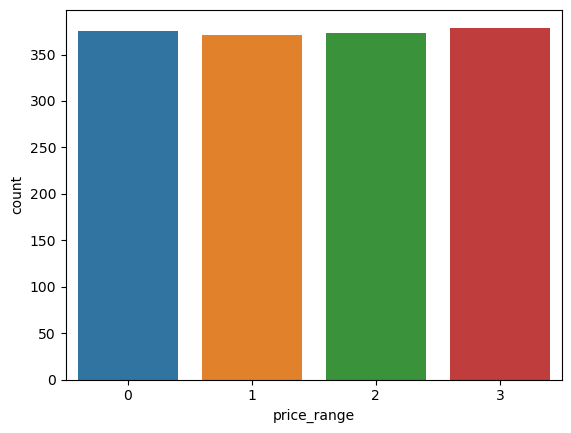

In [338]:
fig1=sns.countplot(train['price_range'])

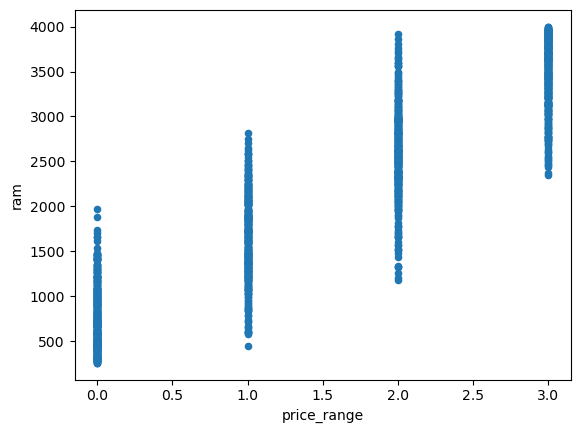

In [339]:
fig2=train.plot(x='price_range',y='ram',kind='scatter')
plt.show()

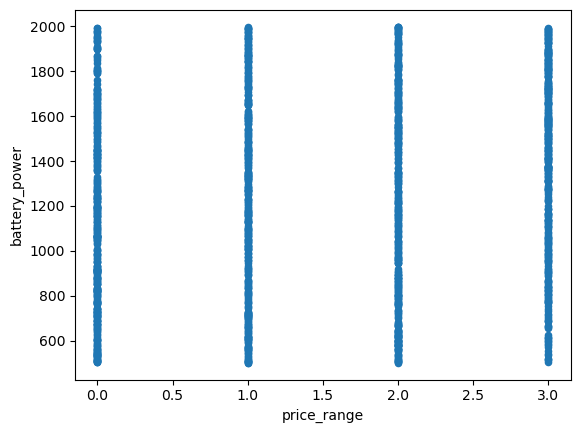

In [340]:
fig3=train.plot(x='price_range',y='battery_power',kind='scatter')
plt.show()

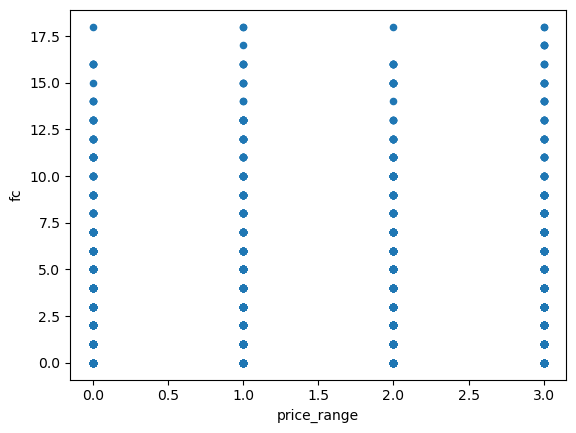

In [341]:
fig4=train.plot(x='price_range',y='fc',kind='scatter')
plt.show()

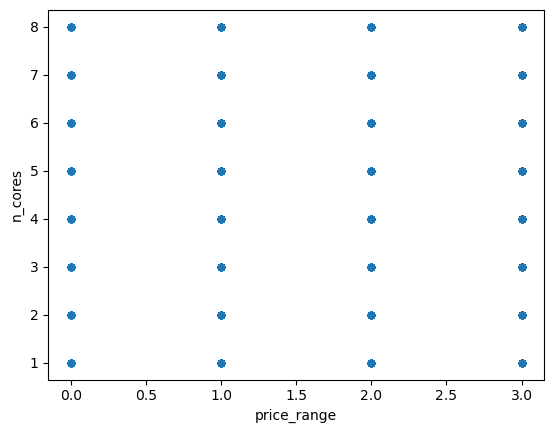

In [342]:
fig5=train.plot(x='price_range',y='n_cores',kind='scatter')
plt.show()

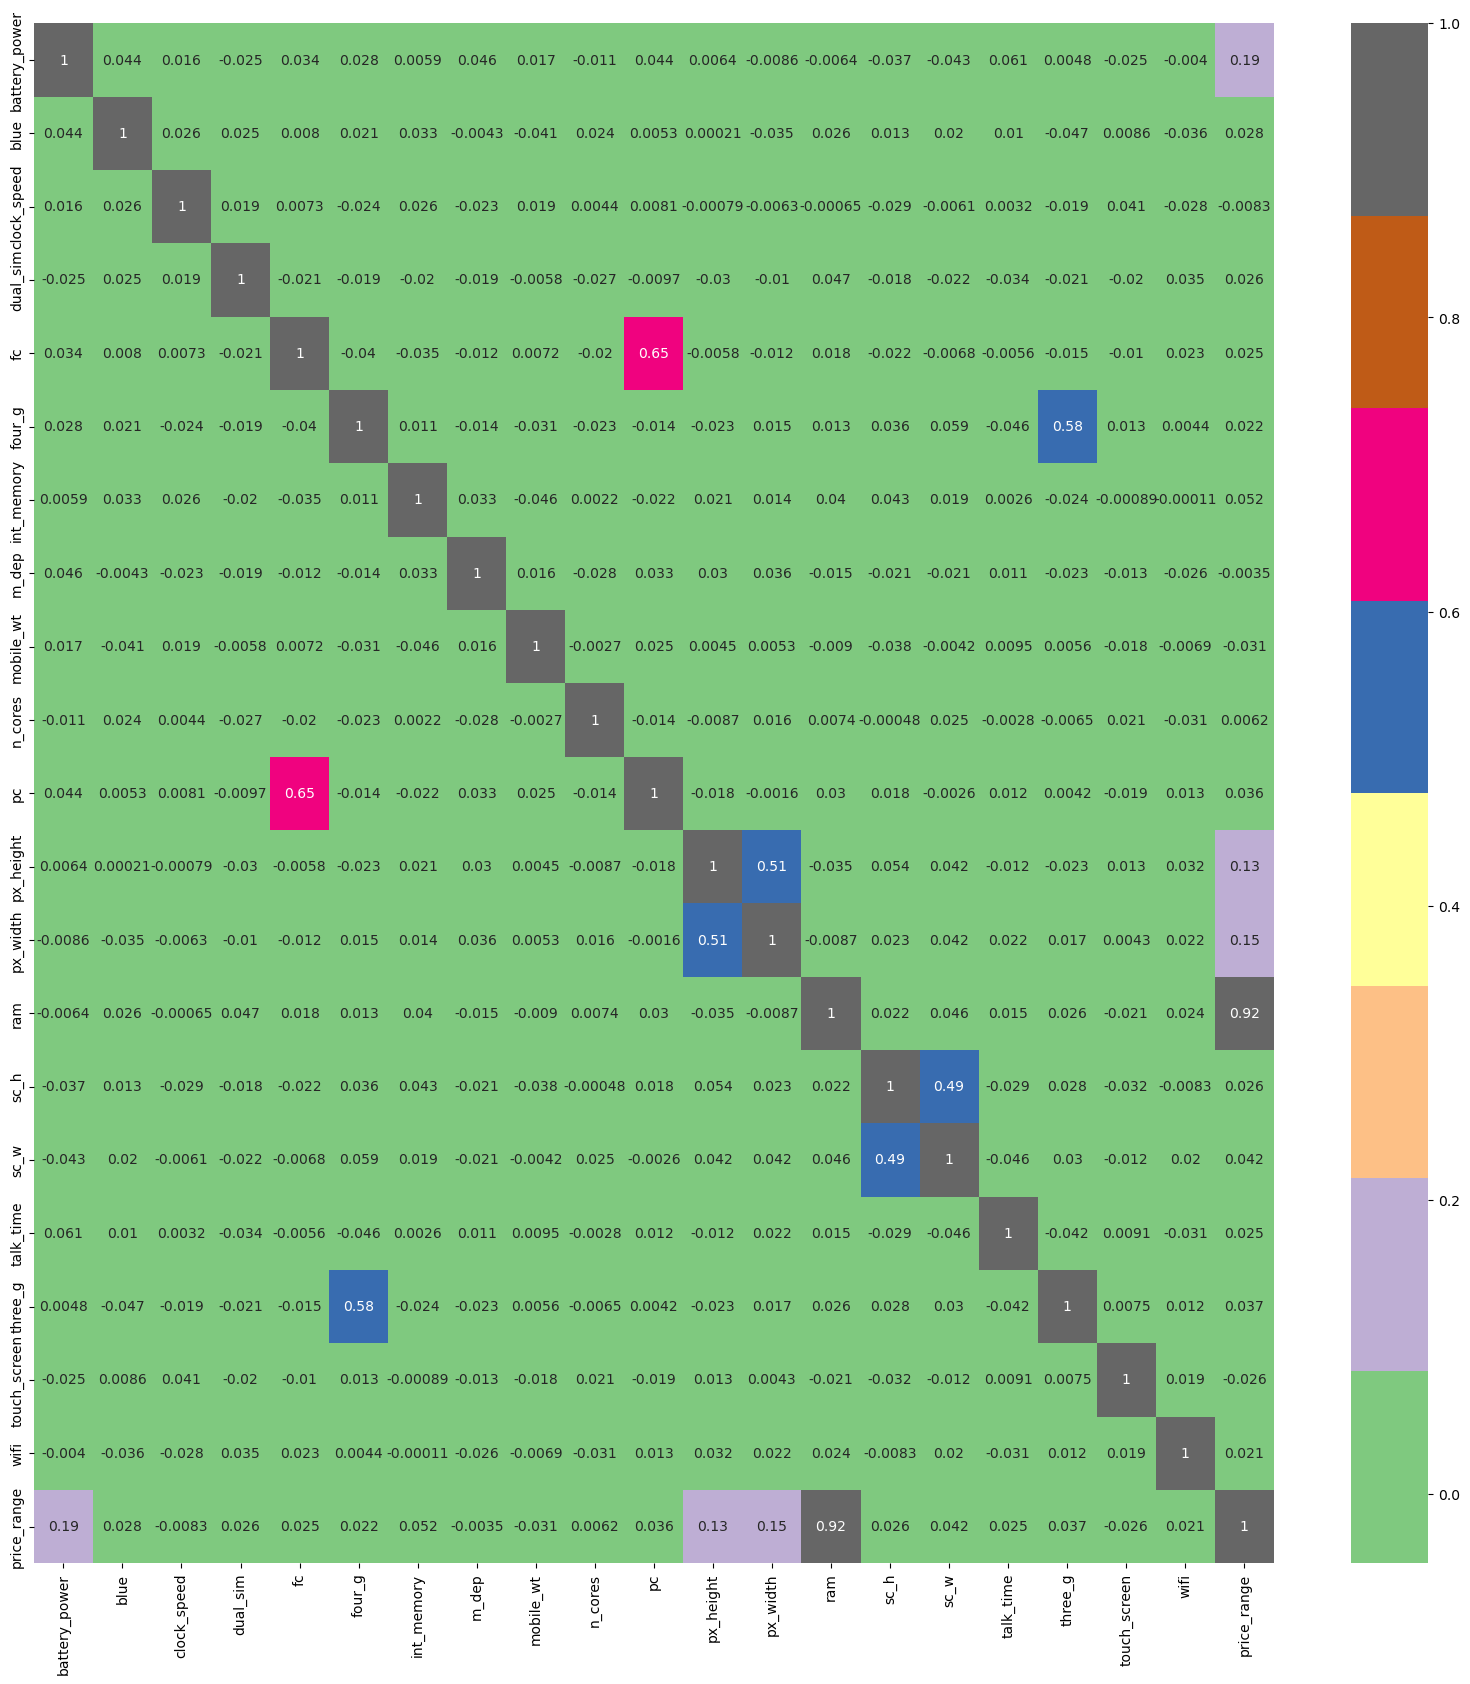

In [343]:
fig6=plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True,cmap=plt.cm.Accent)
plt.show()

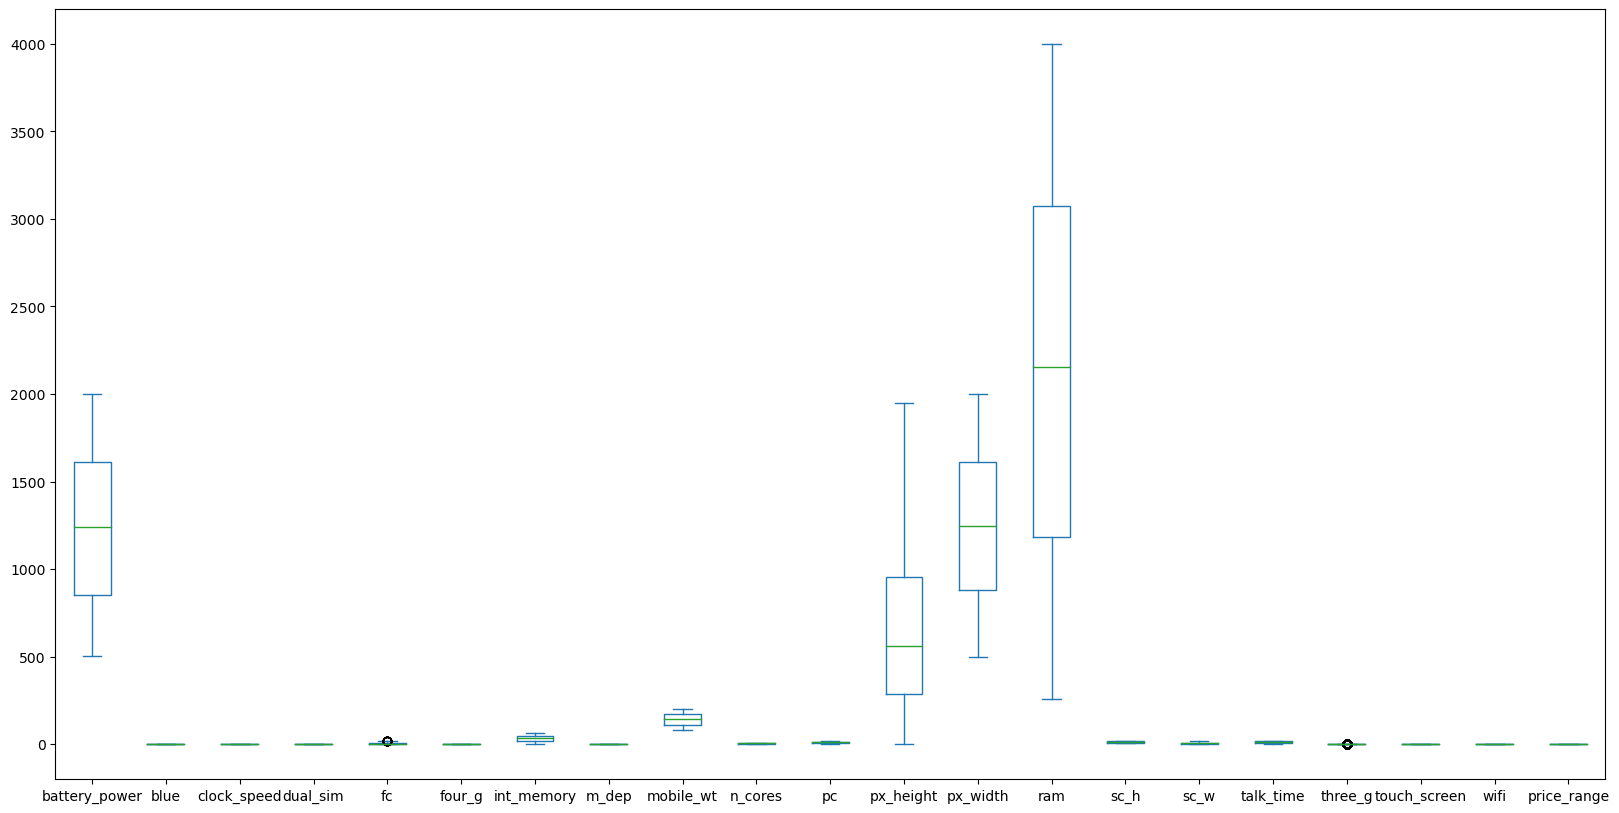

In [344]:
fig7=train.plot(kind='box',figsize=(20,10))

#Train-test splitting

In [345]:
X = train.drop('price_range',axis=1)
y = train['price_range']

In [346]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.1,random_state=101)

In [347]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
test1 = sc.transform(test1)

In [348]:
X_train

array([[-0.94328742,  1.04866032,  0.83969107, ..., -1.75285697,
         0.99408279,  0.96071181],
       [-1.67483271,  1.04866032, -1.25391795, ...,  0.5704972 ,
         0.99408279, -1.04089487],
       [-0.33976256, -0.95359763, -0.88445754, ...,  0.5704972 ,
        -1.00595243,  0.96071181],
       ...,
       [ 1.34736376,  1.04866032,  0.96284454, ...,  0.5704972 ,
        -1.00595243, -1.04089487],
       [ 0.69354516,  1.04866032, -0.02238323, ...,  0.5704972 ,
        -1.00595243, -1.04089487],
       [ 0.41007136, -0.95359763, -0.39184365, ...,  0.5704972 ,
         0.99408279,  0.96071181]])

In [349]:
X_test

array([[-0.87241897, -0.95359763,  0.22392371, ...,  0.5704972 ,
         0.99408279,  0.96071181],
       [-0.92728487, -0.95359763, -0.39184365, ...,  0.5704972 ,
         0.99408279, -1.04089487],
       [ 0.60896023, -0.95359763, -1.13076448, ...,  0.5704972 ,
        -1.00595243,  0.96071181],
       ...,
       [-0.20945605, -0.95359763, -0.51499712, ...,  0.5704972 ,
        -1.00595243, -1.04089487],
       [-1.07588   ,  1.04866032,  1.20915148, ...,  0.5704972 ,
         0.99408279,  0.96071181],
       [ 1.50053105, -0.95359763,  1.5786119 , ..., -1.75285697,
         0.99408279, -1.04089487]])

In [351]:
test1

array([[-0.83355563, -0.95359763, -0.63815059, ...,  0.5704972 ,
         0.99408279,  0.96071181],
       [ 1.13475841,  1.04866032, -1.25391795, ...,  0.5704972 ,
         0.99408279, -1.04089487],
       [-0.04714444, -0.95359763, -1.00761101, ...,  0.5704972 ,
        -1.00595243, -1.04089487],
       ...,
       [ 1.52110576, -0.95359763, -0.76130406, ...,  0.5704972 ,
         0.99408279, -1.04089487],
       [ 0.60896023, -0.95359763, -0.76130406, ...,  0.5704972 ,
         0.99408279,  0.96071181],
       [-1.68169094,  1.04866032,  0.59338412, ...,  0.5704972 ,
         0.99408279,  0.96071181]])

#Building a Logistic Regression Model

In [352]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train, Y_train)

LogisticRegression()

In [353]:
Y_test_pred=log_reg_model.predict(X_test)

In [354]:
Y_test_pred

array([1, 2, 3, 2, 3, 0, 3, 0, 1, 1, 0, 0, 1, 3, 0, 1, 3, 3, 2, 1, 0, 1,
       1, 3, 0, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 2, 3, 2,
       2, 0, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 0, 2, 3, 3, 1, 2, 3, 0,
       2, 2, 1, 1, 0, 0, 0, 2, 3, 2, 2, 1, 1, 3, 3, 0, 2, 2, 3, 3, 1, 0,
       1, 3, 0, 0, 3, 0, 0, 3, 1, 2, 1, 1, 1, 0, 0, 2, 3, 0, 1, 3, 1, 0,
       2, 3, 2, 0, 1, 2, 3, 0, 3, 1, 2, 3, 3, 2, 0, 3, 0, 2, 0, 0, 1, 3,
       2, 1, 0, 0, 2, 2, 0, 2, 0, 2, 1, 1, 2, 2, 2, 1, 1, 0], dtype=int64)

#Accuracy, confusion matrix,classification report:

In [355]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_test_pred))
print("------------------------------------------")
print("confusion_matrix:",metrics.confusion_matrix(Y_test, Y_test_pred))
print("------------------------------------------")
print("classification_report:","\n",metrics.classification_report(Y_test,Y_test_pred))

Accuracy: 0.9666666666666667
------------------------------------------
confusion_matrix: [[35  0  0  0]
 [ 2 41  0  0]
 [ 0  2 42  1]
 [ 0  0  0 27]]
------------------------------------------
classification_report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       0.95      0.95      0.95        43
           2       1.00      0.93      0.97        45
           3       0.96      1.00      0.98        27

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150



#Converting Y_test_pred to a dataframe:

In [356]:
Predictions = pd.DataFrame({'Predicted_price_range': Y_test_pred})
Predictions

,Predicted_price_range
0,1
1,2
2,3
3,2
4,3
...,...
145,2
146,2
147,1
148,1


#Converting dataframe to .csv file:

In [359]:
Pred_price_range =Predictions.to_csv("predictions.csv",index=False)
Pred_price_range

#Verifying the updated predictions file (.csv  file):

In [361]:
predictions=pd.read_csv("predictions.csv")
predictions

,Predicted_price_range
0,1
1,2
2,3
3,2
4,3
...,...
145,2
146,2
147,1
148,1
